In [2]:
import numpy as np
from matplotlib import pyplot as plt
from numpy.random import randint
import tensorflow as tf
from sklearn.model_selection import train_test_split 

2023-07-07 08:53:52.860671: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-07 08:53:52.862520: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-07 08:53:52.897868: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-07 08:53:52.898651: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-07 08:53:53.713899: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [3]:
with open('labels.npy', 'rb') as f:
    labels = np.load(f)

N = len(labels)

y = np.zeros(shape=(N,10))
y[np.arange(0,N,1), labels] = 1


with open('images.npy', 'rb') as f:
    x = np.load(f, allow_pickle=True)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)
train_size = x_train.shape[0]
test_size = x_test.shape[0]

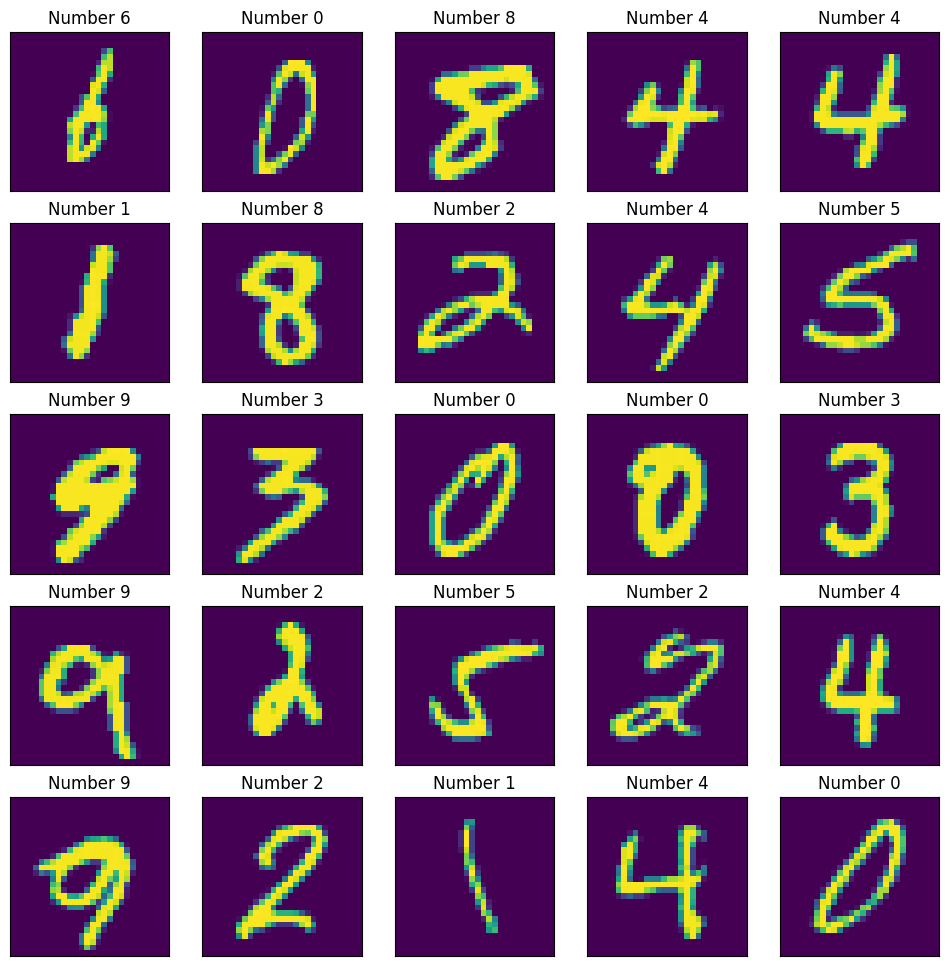

In [19]:
plt.figure(figsize=(12,12))
for i in range(25):
    index = randint(0,N)
    plt.subplot(5,5,i+1)
    plt.imshow(x[index])
    plt.title(f'Number {labels[index]}')
    plt.xticks([])
    plt.yticks([])

In [4]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(x.shape[1:]))
model.add(tf.keras.layers.Conv1D(filters=32, kernel_size=(2)))
model.add(tf.keras.layers.MaxPooling1D(pool_size=(2)))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Conv1D(filters=16, kernel_size=(2)))
model.add(tf.keras.layers.MaxPooling1D(pool_size=(2)))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Activation('softmax'))

model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 27, 32)            1824      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 13, 32)           0         
 )                                                               
                                                                 
 activation (Activation)     (None, 13, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 12, 16)            1040      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 6, 16)            0         
 1D)                                                             
                                                                 
 activation_1 (Activation)   (None, 6, 16)             0

2023-07-07 08:54:06.778113: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [5]:
model.load_weights('model.keras')

In [97]:
history = model.fit(x_train, y_train, batch_size=500, epochs=300, validation_split=0.1)

Epoch 1/300
98/98 [==============================] - 1s 6ms/step - loss: 0.1115 - accuracy: 0.4271 - val_loss: 0.0781 - val_accuracy: 0.6017
Epoch 2/300
98/98 [==============================] - 0s 5ms/step - loss: 0.0726 - accuracy: 0.6312 - val_loss: 0.0714 - val_accuracy: 0.6374
Epoch 3/300
98/98 [==============================] - 1s 5ms/step - loss: 0.0675 - accuracy: 0.6572 - val_loss: 0.0634 - val_accuracy: 0.6761
Epoch 4/300
98/98 [==============================] - 0s 5ms/step - loss: 0.0579 - accuracy: 0.7054 - val_loss: 0.0564 - val_accuracy: 0.7139
Epoch 5/300
98/98 [==============================] - 1s 5ms/step - loss: 0.0533 - accuracy: 0.7284 - val_loss: 0.0554 - val_accuracy: 0.7189
Epoch 6/300
98/98 [==============================] - 1s 5ms/step - loss: 0.0519 - accuracy: 0.7364 - val_loss: 0.0520 - val_accuracy: 0.7361
Epoch 7/300
98/98 [==============================] - 1s 5ms/step - loss: 0.0493 - accuracy: 0.7499 - val_loss: 0.0528 - val_accuracy: 0.7320
Epoch 8/300
9

In [103]:
model.save('model.keras')

In [45]:
prediction = model.predict(x_test, verbose=False)
accuracy = ((prediction == 1) * (y_test == 1)).sum(axis=1).sum()/test_size
print(f'Accuracy {accuracy*100:.2f}%')

Accuracy 97.92%


In [26]:
quantities = {}
hits = {}
for i in range(10):
  hits[i] = 0
  quantities[i] = 0

for i in range(test_size):
  quantities[y_test[i].argmax()] += 1
  correct = prediction[i].argmax() == y_test[i].argmax()
  if correct:
    hits[y_test[i].argmax()] +=1

statistics = []
for i in range(10):
  statistics.append(hits[i]/quantities[i])

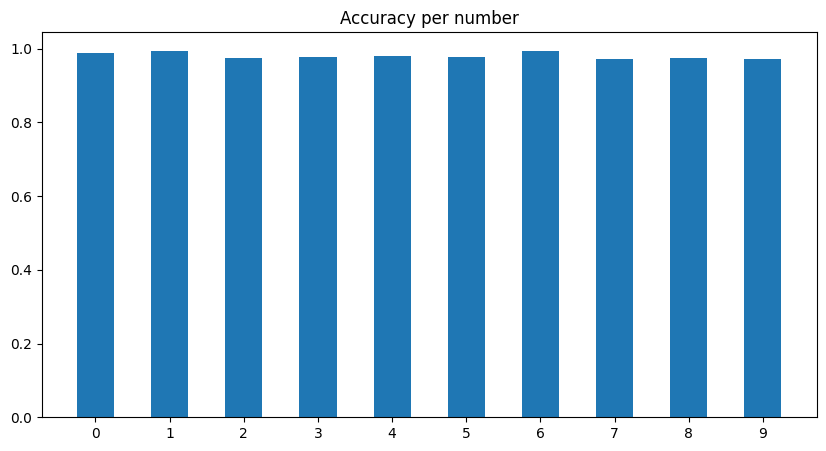

In [44]:
plt.figure(figsize=(10,5))
plt.bar(np.arange(0,10,1), statistics, width=0.5)
plt.xticks(np.arange(0,10,1))
plt.title('Accuracy per number')
plt.show()